In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import chi2, SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [3]:
data = pd.read_csv('../content/lung_cancer_examples.csv')
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
data = data.drop(['Name', 'Surname'], axis=1)
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [5]:
labelled_data = data.copy()

labelled_data['Result'] = labelled_data['Result'].map({0: 'Alive', 1: 'Dead'})

labelled_data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,Dead
1,27,20,2,5,Dead
2,30,0,5,2,Alive
3,28,0,8,1,Alive
4,68,4,5,6,Dead


In [6]:
data.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [7]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))
    print(feature, ':', data[feature].unique())
    print()

Age : 37
Age : [35 27 30 28 68 34 58 22 45 52 33 18 25 39 42 19 62 73 55 44 77 21 37 40
 36 56 47 26 59 50 69 63 31 53 75 43 51]

Smokes : 16
Smokes : [ 3 20  0  4 15 12  2 18 10 25 22  5  8 13 30 34]

AreaQ : 10
AreaQ : [ 5  2  8 10  6  4  3  7  1  9]

Alkhol : 9
Alkhol : [4 5 2 1 6 0 3 8 7]

Result : 2
Result : [1 0]



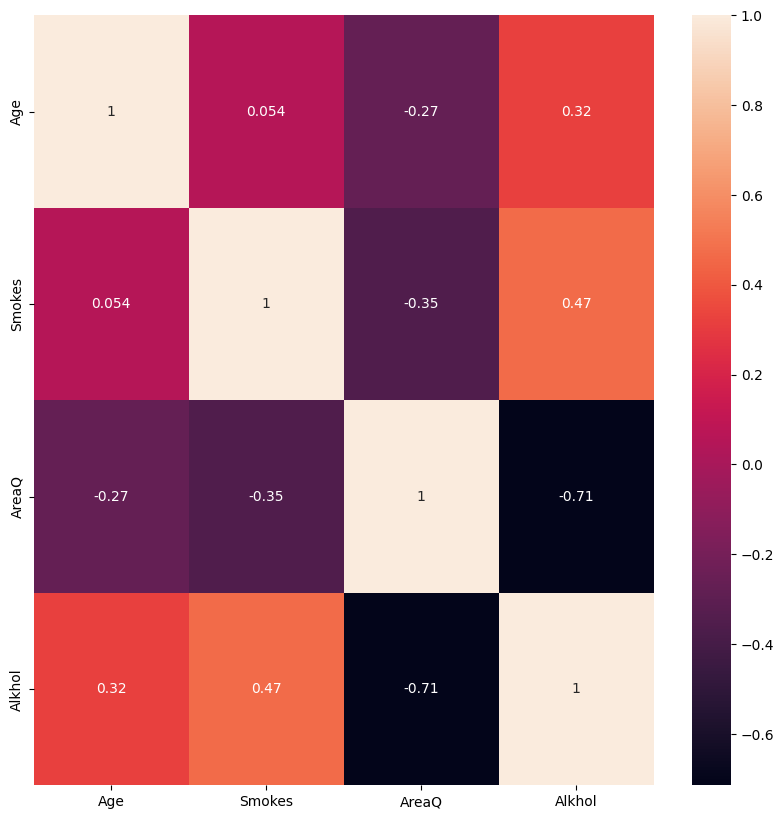

In [8]:
correlation = data.drop(['Result'], axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [9]:
fig = go.Figure(data=[go.Pie(labels=list(Counter(labelled_data['Result']).keys()),
                     values=list(Counter(labelled_data['Result']).values()),
                     title='Result Count Distribution',
                     name='')])
fig.update_traces(textfont_size=20)
fig.update_layout(font=dict(size=18))

fig.show()